<a href="https://colab.research.google.com/github/ihagoSantos/image-analysis-and-computer-vision/blob/main/image_manipulation_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lê imagem do google drive
base_url = '/content/drive/My Drive/Pós Graduação PUC Minas/12 - Análise de Imagem e Visão Computacional/Unidade 1/pratica/lena.jpg'
img = cv2.imread(base_url, 0) # 0 indica que a imagem será lida em escala de cinza

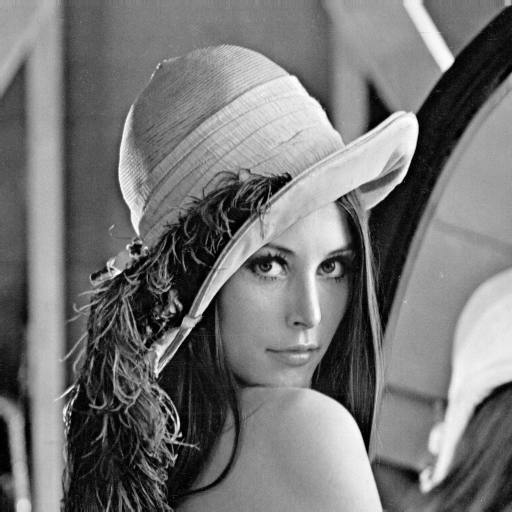

In [4]:
# Exibe imagem
cv2_imshow(img)

# para exibir em outros SOs como win, linux, mac
# cv2.imshow(img)
# cv2.waitKey(0)
# cv2.destrouAllWindows()

In [5]:
# salvando imagem
cv2.imwrite('lena_gray.png', img)

True

# Operações Básicas
## Modificando o alor de um pixel

Uma imagem é uma matriz. No OpenCV, cada pixel (posição da matriz) de uma imagem colorida está no formamto RGB (Blue, Green, Red).

In [6]:
img = cv2.imread(base_url)

px = img[50,50]
print(px) # O OpenCV lê os canais de cores como "BGR" e não "RGB"

[101 156 225]


In [7]:
# Acessando apenas o canal "blue" do pixel
blue = img[50,50,0]
print(blue)

101


In [8]:
# Acessando apenas o canal "red" do pixel
red = img[50, 50, 2]
print(red)

225


In [9]:
# Modificando o valor de um único pixel
img[50,50] = [255, 255, 255]
print(img[50, 50,])

[255 255 255]


In [10]:
# Formma otiizada de acessar pixel de ua imagem usando o numpy
red = img.item(50, 50, 2)
print(red)

255


In [11]:
img.itemset((50, 50, 2), 100) # modificando o pixel
red = img.item(50, 50, 2) # acessando o pixel
print(red)

100


In [12]:
# retornando o shape da imagem
img.shape

(512, 512, 3)

In [13]:
# retornando o número de pixels
img.size

786432

In [14]:
# imprimindo apenas o canal GREEN
b,g,r = cv2.split(img) # split separa cada canal de cor
print(g)

[[153 151 152 ... 164 144 105]
 [151 152 151 ... 165 144 105]
 [153 148 151 ... 164 143 104]
 ...
 [  7   6  15 ...  74  69  60]
 [ 10  12  24 ...  74  70  76]
 [ 13   9  20 ...  71  73  74]]


In [15]:
# Modificando apenas o canal red para 0
img[:, :, 2] = 0
cv2.imwrite('lena_red.png', img)

True

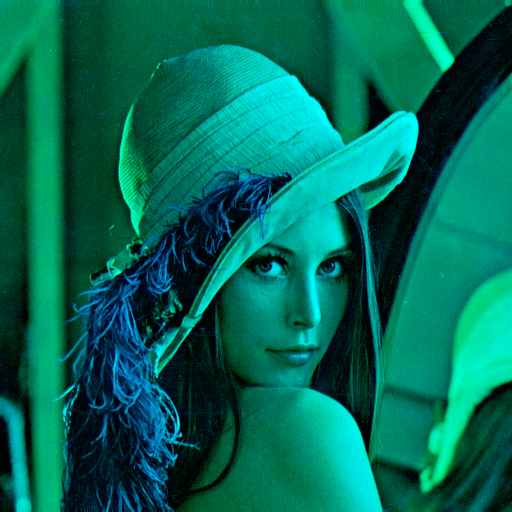

In [16]:
img_red = cv2.imread("lena_red.png")
cv2_imshow(img_red)

## Rotação na imagem

In [17]:
import imutils

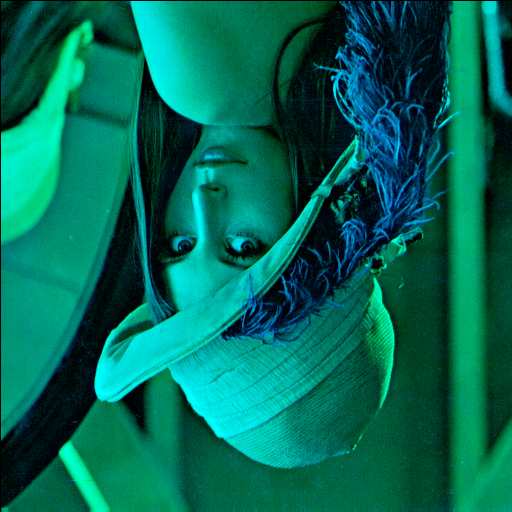

In [20]:
# rotaciona imagem em 180°
rotated = imutils.rotate(img, 180)
cv2_imshow(rotated)

## Redimensionamento

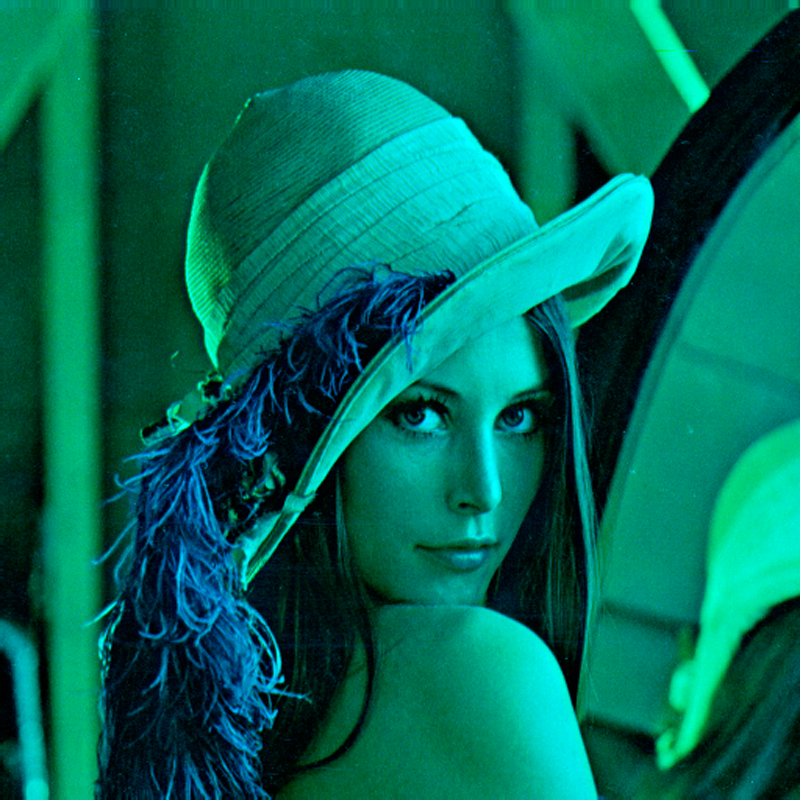

In [21]:
# redimensionando a imagem
resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized)

# Funções de desenho

Desenhando uma linha.\
Para desenhar uma linha, você precisa passar as cordenadas inicial e final da linha.\
Criando uma imagem preta e desenhando uma linha azul nos cantos superior esquerdo e inferior direito.\
\
OBS.: O ponto (0, 0) de uma imagem é no canto superior esquerdo!

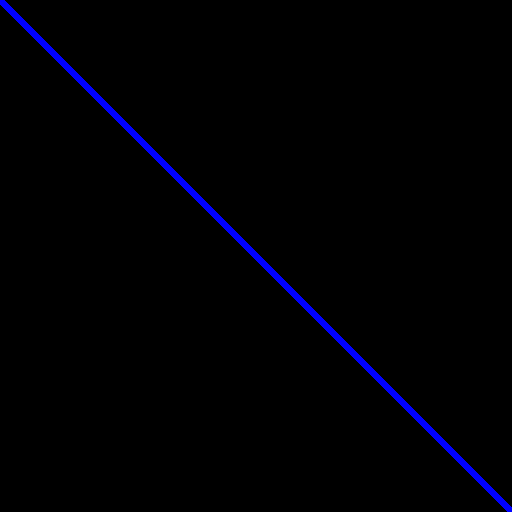

In [22]:
# Criando uma imagem de cor preta
img = np.zeros((512, 512, 3), np.uint8)

# Desenhando linha azul na diagonal com largura de 5 px
img = cv2.line(img, (0, 0), (512, 512), (255, 0, 0), 5)

cv2_imshow(img)

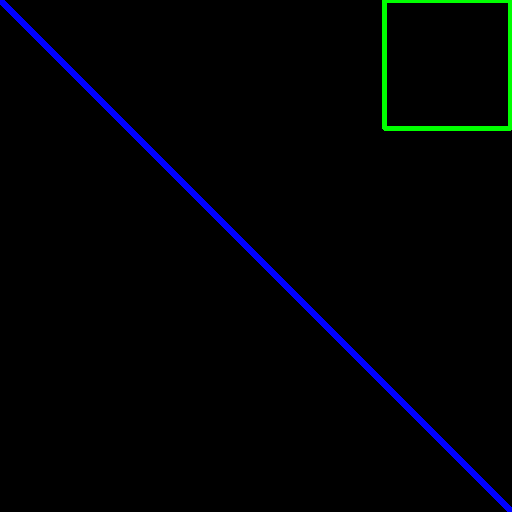

In [23]:
# Desenhando um retângulo
# Especificamos o canto superior esquerdo e o canto inferior direito do retângulo
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
cv2_imshow(img)

# Adicionando textro em uma imagem

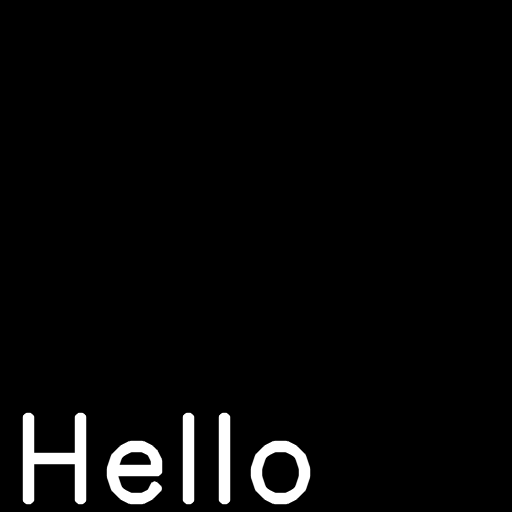

In [24]:
# criando uma imagem de cor preta
img = np.zeros((512, 512, 3), np.uint8)

font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img, "Hello", (10, 500), font, 4, (255,255,255), 5, cv2.LINE_AA)
cv2_imshow(img)

# Trabalhando com vídeos

Abrindo um arquivo de vídeo

In [25]:
import os
import os.path

In [27]:
frames_dir = 'frame/'

if not os.path.exists(frames_dir):
  os.makedirs(frames_dir)

In [28]:
base_url = '/content/drive/My Drive/Pós Graduação PUC Minas/12 - Análise de Imagem e Visão Computacional/Unidade 1/pratica/transito.mp4'
cap = cv2.VideoCapture(base_url)

# frame id
frame_id = 0

ret = True
while ret:
  # capture frame by frame
  ret, frame = cap.read()

  if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert color to gray

    frame_path = os.path.join(frames_dir, str(frame_id) + ".jpg")

    # save image on disco
    cv2.imwrite(frame_path, gray)

    frame_id += 1

cap.release()